<h1 align='center'>Investiție la bursa istorică (Backtesting) folosind SMA (Simple Moving Average)</h1>

<h2 align='justify'>Includerea (importarea) de librării necesare executării programului</h2>

In [1]:
import numpy as np
#Pentru structuri de date de tip tablou si operatii matematice complexe

import pandas as pd
#Pentru manipularea datelor organizate sub forma de tabel precum datele despre o companie

import matplotlib.pyplot as plt
#Pentru reprezentarea grafica a informațiilor

import yfinance as yf
#Obtinerea datelor despre o companie folosind Yahoo Finance

<h2 align='justify'>Downloadarea datelor despre o companie</h2>
<p align='justify'>&nbsp;&nbsp;&nbsp;&nbsp;Ca exemplu, am folosit datele despre compania AAPL (Apple Inc.)</p>

In [2]:
data = yf.download('AAPL',start = '2019-01-01',end = '2023-01-01')
#Functia download primeste mai multi parametri printre care simbolul companiei si datele de inceput
#si sfarsit pentru care se realizeaza cautarea informatiilor

data
#Afisarea variabilei

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.047050,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.257282,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.719696,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.640194,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.319607,164101200
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400


<h2 align='justify'>Funcție pentru calcularea SMA (medie aritmetică mobilă)</h2>

In [3]:
def SMA(data, period, column = 'Close'):
    return data[column].rolling(period).mean()

<h2 align='justify'>Adăugarea de noi coloane în structura de date</h2>

In [4]:
data['Short_SMA'] = SMA(data,50)
#Short SMA, adica pe o perioada mai scurta de zile

data['Long_SMA'] = SMA(data,100)
#Long SMA, adica pe o perioada mai lunga de zile

data

,Open,High,Low,Close,Adj Close,Volume,Short_SMA,Long_SMA
Date,,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.047050,148158800,NaN,NaN
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.257282,365248800,NaN,NaN
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.719696,234428400,NaN,NaN
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.640194,219111200,NaN,NaN
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.319607,164101200,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,144.131800,150.515600
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,143.964799,150.157800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,143.637399,149.764699


<h2 align='justify'>Implementarea și reprezentarea grafică a strategiei Moving Average Crossover</h2>
<p></p>

In [5]:
def strategy(data):
    buy = []
    sell = []
    sum = []
    s = 1000 # investitia initiala
    cnt = 0 # numar de actiuni
    for i in range(0, len(data)):
        if data['Short_SMA'][i] < data['Long_SMA'][i] and s > data['Close'][i]:
            # semnal de cumparare
            s = s - data['Close'][i]
            cnt = cnt + 1
            buy.append(data['Close'][i])
            sell.append(np.nan)
        elif data['Short_SMA'][i] > data['Long_SMA'][i] and cnt != 0:
            # semnal de vanzare
            s = s + data['Close'][i]
            cnt = cnt - 1
            buy.append(np.nan)
            sell.append(data['Close'][i])
        else:
            buy.append(np.nan)
            sell.append(np.nan)
        sum.append(s)
    return (buy, sell, sum)

In [6]:
strat = strategy(data)
data['Buy'] = strat[0]
data['Sell'] = strat[1]
data['Sum'] = strat[2]

data

,Open,High,Low,Close,Adj Close,Volume,Short_SMA,Long_SMA,Buy,Sell,Sum
Date,,,,,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.047050,148158800,NaN,NaN,NaN,NaN,1000.000000
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.257282,365248800,NaN,NaN,NaN,NaN,1000.000000
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.719696,234428400,NaN,NaN,NaN,NaN,1000.000000
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.640194,219111200,NaN,NaN,NaN,NaN,1000.000000
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.319607,164101200,NaN,NaN,NaN,NaN,1000.000000
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,144.131800,150.515600,NaN,NaN,9.937473
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,143.964799,150.157800,NaN,NaN,9.937473
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,143.637399,149.764699,NaN,NaN,9.937473


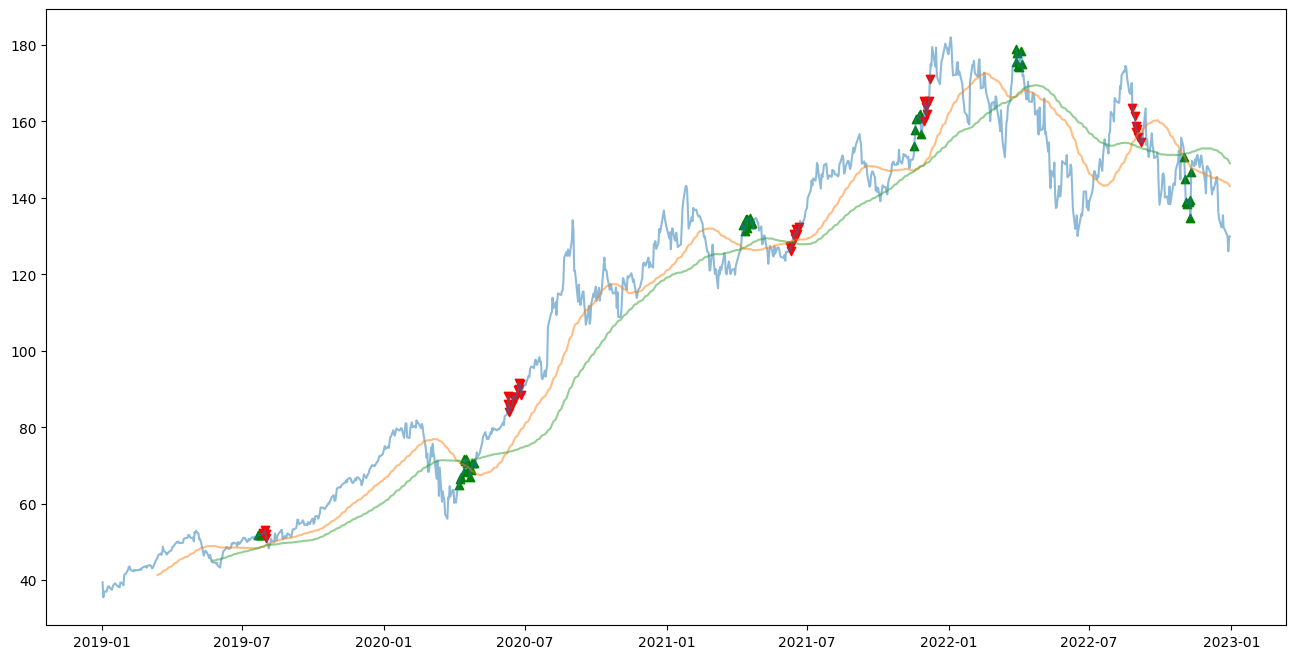

In [7]:
plt.figure(figsize = (16, 8))
plt.plot(data['Close'],alpha = 0.5,label = 'Close')
plt.plot(data['Short_SMA'],alpha = 0.5,label = 'Short_SMA')
plt.plot(data['Long_SMA'],alpha = 0.5,label = 'Long_SMA')
plt.scatter(data.index,data['Buy'],color = 'green',label = 'Buy signal', marker = '^',alpha = 1)
plt.scatter(data.index,data['Sell'],color = 'red',label = 'Sell signal',marker = 'v',alpha = 1)
plt.show()

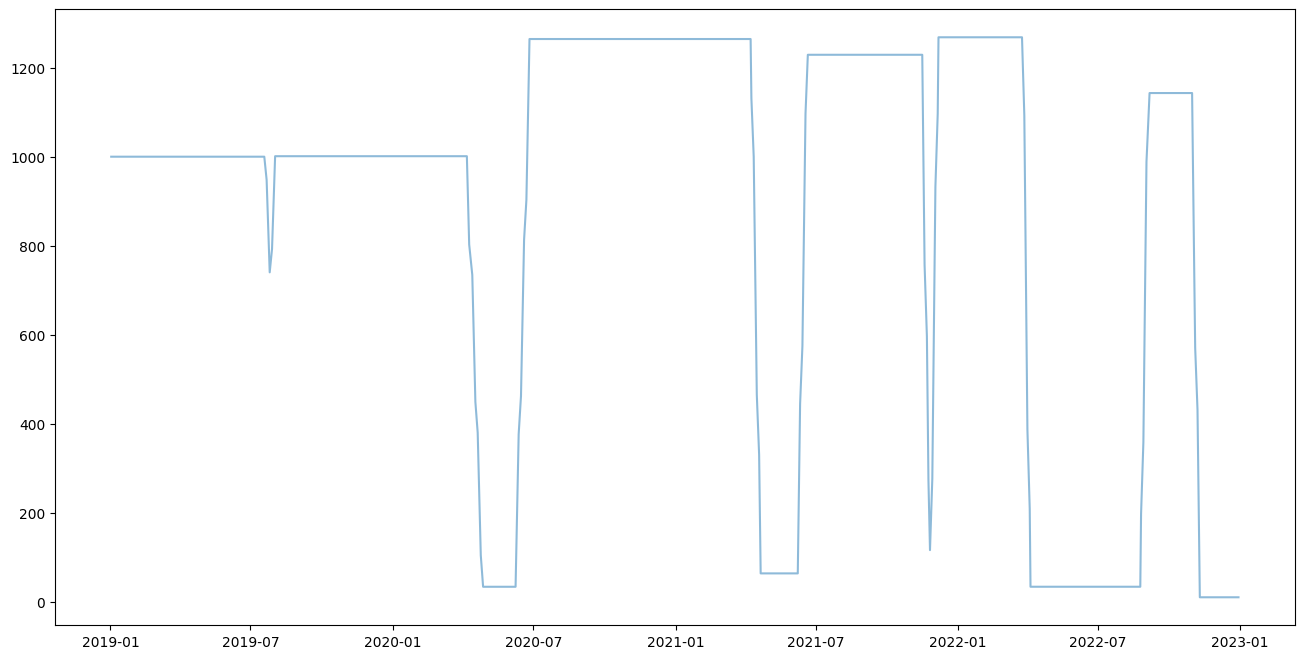

In [8]:
plt.figure(figsize = (16, 8))
plt.plot(data['Sum'],alpha = 0.5, label = 'Sum over time')
plt.show()

In [9]:
for i in range(0, len(data)):
    print(data['Sum'][i])

1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
948.1949996948242
895.985000610351